In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Jensen value is: [0.03443611]


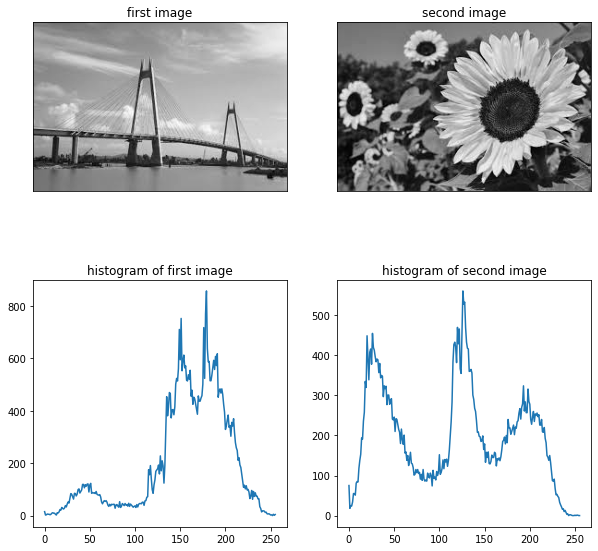

In [2]:
img1 = np.array(cv2.imread("bridge1.jpg", cv2.IMREAD_GRAYSCALE))
img2 = np.array(cv2.imread("flower.jpg", cv2.IMREAD_GRAYSCALE))

img1_hist = cv2.calcHist([img1], [0], None, [256], [0, 256])
p = img1_hist.T + 256
img2_hist = cv2.calcHist([img2], [0], None, [256], [0, 256])
q = img2_hist.T + 256

newp = p / np.sum(p)
newq = q / np.sum(q)
t1 = newp * np.log2(newp)
t2= newq * np.log2(newq)
t3 = (newp + newq) * np.log2((newp + newq) / 2)
dis = (t1 + t2 - t3)
# Jensen
Jensen = (1 / 2) * np.sum(dis, 1)
print("Jensen value is: {}".format(Jensen))

fig, axes= plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].imshow(img1, cmap='gray')
axes[0,0].set_title('first image')

axes[0,1].imshow(img2, cmap='gray')
axes[0,1].set_title('second image')

axes[1,0].plot(range(256),img1_hist)
axes[1,0].set_title('histogram of first image')

axes[1,1].plot(range(256),img2_hist)
axes[1,1].set_title('histogram of second image')

# remove the x and y ticks
for ax in axes[0]:
    ax.set_xticks([])
    ax.set_yticks([])

cv2.waitKey(0)
cv2.destroyAllWindows()
